In [1]:
import pandas as pd
import numpy as np
import wbgapi as wb
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')


### Return The DATA from World Bank 

In [2]:
countries = ["IND","USA","CHN","NGA","NPL","NZL","AUS","AUT","BGD","CAN"]

# print power consumption KWh and population growth%
indicator_code = ['SP.POP.GROW','EG.USE.ELEC.KH.PC']

data = wb.data.DataFrame(indicator_code, countries, time = range(2000,2015))

In [3]:
data

YR2000        YR2001        YR2002  \
economy series                                                        
AUS     EG.USE.ELEC.KH.PC  10193.912181  10636.377685  10813.122729   
        SP.POP.GROW            1.192272      1.348358      1.220564   
AUT     EG.USE.ELEC.KH.PC   7076.269483   7333.231953   7427.656445   
        SP.POP.GROW            0.240467      0.382799      0.491980   
BGD     EG.USE.ELEC.KH.PC    104.607737    115.144505    122.986387   
        SP.POP.GROW            1.952390      1.886286      1.820058   
CAN     EG.USE.ELEC.KH.PC  17037.072281  16840.193751  16960.639672   
        SP.POP.GROW            0.931282      1.086351      1.087448   
CHN     EG.USE.ELEC.KH.PC    992.943385   1076.549121   1194.856295   
        SP.POP.GROW            0.787957      0.726381      0.670000   
IND     EG.USE.ELEC.KH.PC    393.646248    393.810198    410.644784   
        SP.POP.GROW            1.768126      1.728769      1.689562   
NGA     EG.USE.ELEC.KH.PC     74.490620     75.569776    104.661045   
        SP.POP.GROW            2.503856      2.511614      2.521517   
NPL     EG.USE.ELEC.KH.PC     58.811001     64.484031     67.541265   
        SP.POP.GROW            1.817198      1.681667      1.542688   
NZL     EG.USE.ELEC.KH.PC   9384.348187   9417.343126   9526.655692   
        SP.POP.GROW            0.587564      0.589286      1.737175   
USA     EG.USE.ELEC.KH.PC  13671.052024  13046.614148  13296.182299   
        SP.POP.GROW            1.112769      0.989741      0.927797   

                                 YR2003        YR2004        YR2005  \
economy series                                                        
AUS     EG.USE.ELEC.KH.PC  10434.874393  10554.815823  10458.450193   
        SP.POP.GROW            1.233997      1.159352      1.319790   
AUT     EG.USE.ELEC.KH.PC   7695.080037   7808.157792   7977.681597   
        SP.POP.GROW            0.487134      0.620413      0.681267   
BGD     EG.USE.ELEC.KH.PC    129.392338    165.308346    176.077326   
        SP.POP.GROW            1.731269      1.615200      1.484747   
CAN     EG.USE.ELEC.KH.PC  17208.523517  17264.736744  16948.275221   
        SP.POP.GROW            0.901373      0.933021      0.944467   
CHN     EG.USE.ELEC.KH.PC   1379.484632   1585.838782   1782.312153   
        SP.POP.GROW            0.622861      0.593933      0.588125   
IND     EG.USE.ELEC.KH.PC    430.483163    451.611546    468.025754   
        SP.POP.GROW            1.651491      1.615308      1.579709   
NGA     EG.USE.ELEC.KH.PC    101.925211    123.632487    129.327031   
        SP.POP.GROW            2.537254      2.559658      2.585689   
NPL     EG.USE.ELEC.KH.PC     70.531815     74.431524     77.065004   
        SP.POP.GROW            1.426565      1.340438      1.271083   
NZL     EG.USE.ELEC.KH.PC   9407.032181   9666.299694   9673.673771   
        SP.POP.GROW            1.973559      1.486219      1.128774   
USA     EG.USE.ELEC.KH.PC  13307.492009  13388.589711  13704.577048   
        SP.POP.GROW            0.859482      0.925484      0.921713   

                                 YR2006        YR2007        YR2008  \
economy series                                                        
AUS     EG.USE.ELEC.KH.PC  10490.484542  10972.891740  10749.110555   
        SP.POP.GROW            1.475228      0.624678      2.004022   
AUT     EG.USE.ELEC.KH.PC   8244.401952   8207.474739   8233.014833   
        SP.POP.GROW            0.494798      0.324147      0.313041   
BGD     EG.USE.ELEC.KH.PC    196.939914    206.104875    207.526929   
        SP.POP.GROW            1.347121      1.226631      1.145647   
CAN     EG.USE.ELEC.KH.PC  16508.339552  16683.133659  16377.479696   
        SP.POP.GROW            1.010335      0.971135      1.082907   
CHN     EG.USE.ELEC.KH.PC   2039.014660   2325.926769   2446.369055   
        SP.POP.GROW            0.558374      0.522272      0.512387   
IND     EG.USE.ELEC.KH.PC    509.214055    541.738395  

In [4]:
data.reset_index(inplace =True)

In [5]:
data['series'] = data['series'].apply(lambda x: "energy_cons" if x == "EG.USE.ELEC.KH.PC" else "pop_grow")

In [6]:
data.to_excel("worldbank.xlsx", index=False)

In [7]:
# this function is call data frame to split two dataframes.
def world_bank(filename):
    
    """reads a dataframe in World bank format and returns two dataframes:
    one with years as columns and one with countries as columns"""

    df = pd.read_excel(filename)

    df_years = df.set_index(['economy', 'series'])
    df_countries= df_years.T

    return (df_years, df_countries)

In [8]:
df_years, df_countries = world_bank(filename = "worldbank.xlsx")

In [9]:
df_years

YR2000        YR2001        YR2002        YR2003  \
economy series                                                                
AUS     energy_cons  10193.912181  10636.377685  10813.122729  10434.874393   
        pop_grow         1.192272      1.348358      1.220564      1.233997   
AUT     energy_cons   7076.269483   7333.231953   7427.656445   7695.080037   
        pop_grow         0.240467      0.382799      0.491980      0.487134   
BGD     energy_cons    104.607737    115.144505    122.986387    129.392338   
        pop_grow         1.952390      1.886286      1.820058      1.731269   
CAN     energy_cons  17037.072281  16840.193751  16960.639672  17208.523517   
        pop_grow         0.931282      1.086351      1.087448      0.901373   
CHN     energy_cons    992.943385   1076.549121   1194.856295   1379.484632   
        pop_grow         0.787957      0.726381      0.670000      0.622861   
IND     energy_cons    393.646248    393.810198    410.644784    430.483163   
        pop_grow         1.768126      1.728769      1.689562      1.651491   
NGA     energy_cons     74.490620     75.569776    104.661045    101.925211   
        pop_grow         2.503856      2.511614      2.521517      2.537254   
NPL     energy_cons     58.811001     64.484031     67.541265     70.531815   
        pop_grow         1.817198      1.681667      1.542688      1.426565   
NZL     energy_cons   9384.348187   9417.343126   9526.655692   9407.032181   
        pop_grow         0.587564      0.589286      1.737175      1.973559   
USA     energy_cons  13671.052024  13046.614148  13296.182299  13307.492009   
        pop_grow         1.112769      0.989741      0.927797      0.859482   

                           YR2004        YR2005        YR2006        YR2007  \
economy series                                                                
AUS     energy_cons  10554.815823  10458.450193  10490.484542  10972.891740   
        pop_grow         1.159352      1.319790      1.475228      0.624678   
AUT     energy_cons   7808.157792   7977.681597   8244.401952   8207.474739   
        pop_grow         0.620413      0.681267      0.494798      0.324147   
BGD     energy_cons    165.308346    176.077326    196.939914    206.104875   
        pop_grow         1.615200      1.484747      1.347121      1.226631   
CAN     energy_cons  17264.736744  16948.275221  16508.339552  16683.133659   
        pop_grow         0.933021      0.944467      1.010335      0.971135   
CHN     energy_cons   1585.838782   1782.312153   2039.014660   2325.926769   
        pop_grow         0.593933      0.588125      0.558374      0.522272   
IND     energy_cons    451.611546    468.025754    509.214055    541.738395   
        pop_grow         1.615308      1.579709      1.545696      1.509222   
NGA     energy_cons    123.632487    129.327031    111.752416    138.909417   
        pop_grow         2.559658      2.585689      2.610843      2.632171   
NPL     energy_cons     74.431524     77.065004     83.823464     87.633563   
        pop_grow         1.340438      1.271083      1.243713      1.204603   
NZL     energy_cons   9666.299694   9673.673771   9700.090809   9640.607983   
        pop_grow         1.486219      1.128774      1.218985      0.932408   
USA     energy_cons  13388.589711  13704.577048  13583.266959  13657.452828   
        pop_grow         0.925484      0.921713      0.964254      0.951055   

                           YR2008        YR2009        YR2010        YR2011  \
economy series                                                                
AUS     energy_cons  10749.110555  10791.593098  10726.928183  10627.293865   
        pop_grow         2.004022      2.061045      1.555490      1.389527   
AUT     energy_cons   8233.014833   7944.796096   8382.711154   8425.167753   
        pop_grow         0.313041      0.261953      0.240394      0.337081   
BGD     energy_cons    207.526929    226.047945    247.263378    265.640567

In [10]:
df_countries

economy           AUS                    AUT                   BGD            \
series    energy_cons  pop_grow  energy_cons  pop_grow energy_cons  pop_grow   
YR2000   10193.912181  1.192272  7076.269483  0.240467  104.607737  1.952390   
YR2001   10636.377685  1.348358  7333.231953  0.382799  115.144505  1.886286   
YR2002   10813.122729  1.220564  7427.656445  0.491980  122.986387  1.820058   
YR2003   10434.874393  1.233997  7695.080037  0.487134  129.392338  1.731269   
YR2004   10554.815823  1.159352  7808.157792  0.620413  165.308346  1.615200   
YR2005   10458.450193  1.319790  7977.681597  0.681267  176.077326  1.484747   
YR2006   10490.484542  1.475228  8244.401952  0.494798  196.939914  1.347121   
YR2007   10972.891740  0.624678  8207.474739  0.324147  206.104875  1.226631   
YR2008   10749.110555  2.004022  8233.014833  0.313041  207.526929  1.145647   
YR2009   10791.593098  2.061045  7944.796096  0.261953  226.047945  1.116806   
YR2010   10726.928183  1.555490  8382.711154  0.240394  247.263378  1.124807   
YR2011   10627.293865  1.389527  8425.167753  0.337081  265.640567  1.143829   
YR2012   10407.740307  1.745820  8548.882199  0.455937  283.466059  1.154006   
YR2013   10220.887301  1.721151  8509.611580  0.589387  301.967618  1.155951   
YR2014   10071.398979  1.491566  8355.841952  0.781542  320.209923  1.142930   

economy           CAN                    CHN                   IND            \
series    energy_cons  pop_grow  energy_cons  pop_grow energy_cons  pop_grow   
YR2000   17037.072281  0.931282   992.943385  0.787957  393.646248  1.768126   
YR2001   16840.193751  1.086351  1076.549121  0.726381  393.810198  1.728769   
YR2002   16960.639672  1.087448  1194.856295  0.670000  410.644784  1.689562   
YR2003   17208.523517  0.901373  1379.484632  0.622861  430.483163  1.651491   
YR2004   17264.736744  0.933021  1585.838782  0.593933  451.611546  1.615308   
YR2005   16948.275221  0.944467  1782.312153  0.588125  468.025754  1.579709   
YR2006   16508.339552  1.010335  2039.014660  0.558374  509.214055  1.545696   
YR2007   16683.133659  0.971135  2325.926769  0.522272  541.738395  1.509222   
YR2008   16377.479696  1.082907  2446.369055  0.512387  561.247581  1.464890   
YR2009   15450.730689  1.141758  2612.456620  0.497381  598.498242  1.410583   
YR2010   15269.745477  1.111864  2943.589954  0.482960  640.394607  1.350338   
YR2011   15644.540278  0.978698  3295.784868  0.546458  696.842681  1.288513   
YR2012   15336.624857  1.085817  3466.019539  0.678345  723.236917  1.231485   
YR2013   15750.811633  1.056591  3757.185088  0.666073  764.201134  1.182904   
YR2014   15588.487146  1.005338  3905.317598  0.630326  804.516349  1.145673   

economy         NGA                   NPL                    NZL            \
series  energy_cons  pop_grow energy_cons  pop_grow  energy_cons  pop_grow   
YR2000    74.490620  2.503856   58.811001  1.817198  9384.348187  0.587564   
YR2001    75.569776  2.511614   64.484031  1.681667  9417.343126  0.589286   
YR2002   104.661045  2.521517   67.541265  1.542688  9526.655692  1.737175   
YR2003   101.925211  2.537254   70.531815  1.426565  9407.032181  1.973559   
YR2004   123.632487  2.559658   74.431524  1.340438  9666.299694  1.486219   
YR2005   129.327031  2.585689   77.065004  1.271083  9673.673771  1.128774   
YR2006   111.752416  2.610843   83.823464  1.243713  9700.090809  1.218985   
YR2007   138.909417  2.632171   87.633563  1.204603  9640.607983  0.932408   
YR2008   127.244614  2.649868   83.475268  1.070696  9556.317198  0.848701   
YR2009   120.635071  2.662921   96.936671  0.810274  9403.848836  0.999728   
YR2010   136.426265  2.671443  102.542434  0.481203  9601.903142  1.111726   
YR2011   150.198016  2.677886  115.823177  0.103647  9458.485401  0.762480   
YR2012   156.797152  2.680930  120.900391 -0.192706  9360.949162  0.548221   
YR2013   142.729212  2.676908  136.643311 -0.268486  9089.619774  0.768348   
YR2014   144.525438  2.665007 

### checking summary statistics for electricity consumption

In [11]:
df_years_copy = df_years.reset_index()

In [12]:
# create two dataframes population and electric power coumption and reset all index's.
ele_power = df_years_copy[df_years_copy['series'] == 'energy_cons']
ele_power = ele_power.reset_index(drop = True)

population = df_years_copy[df_years_copy['series'] == 'pop_grow']
population = population.reset_index(drop = True)

In [13]:
ele_power

,economy,series,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014
0,AUS,energy_cons,10193.912181,10636.377685,10813.122729,10434.874393,10554.815823,10458.450193,10490.484542,10972.891740,10749.110555,10791.593098,10726.928183,10627.293865,10407.740307,10220.887301,10071.398979
1,AUT,energy_cons,7076.269483,7333.231953,7427.656445,7695.080037,7808.157792,7977.681597,8244.401952,8207.474739,8233.014833,7944.796096,8382.711154,8425.167753,8548.882199,8509.611580,8355.841952
2,BGD,energy_cons,104.607737,115.144505,122.986387,129.392338,165.308346,176.077326,196.939914,206.104875,207.526929,226.047945,247.263378,265.640567,283.466059,301.967618,320.209923
3,CAN,energy_cons,17037.072281,16840.193751,16960.639672,17208.523517,17264.736744,16948.275221,16508.339552,16683.133659,16377.479696,15450.730689,15269.745477,15644.540278,15336.624857,15750.811633,15588.487146
4,CHN,energy_cons,992.943385,1076.549121,1194.856295,1379.484632,1585.838782,1782.312153,2039.014660,2325.926769,2446.369055,2612.456620,2943.589954,3295.784868,3466.019539,3757.185088,3905.317598
5,IND,energy_cons,393.646248,393.810198,410.644784,430.483163,451.611546,468.025754,509.214055,541.738395,561.247581,598.498242,640.394607,696.842681,723.236917,764.201134,804.516349
6,NGA,energy_cons,74.490620,75.569776,104.661045,101.925211,123.632487,129.327031,111.752416,138.909417,127.244614,120.635071,136.426265,150.198016,156.797152,142.729212,144.525438
7,NPL,energy_cons,58.811001,64.484031,67.541265,70.531815,74.431524,77.065004,83.823464,87.633563,83.475268,96.936671,102.542434,115.823177,120.900391,136.643311,146.473004
8,NZL,energy_cons,9384.348187,9417.343126,9526.655692,9407.032181,9666.299694,9673.673771,9700.090809,9640.607983,9556.317198,9403.848836,9601.903142,9458.485401,9360.949162,9089.619774,9012.731097
9,USA,energy_cons,13671.052024,13046.614148,13296.182299,13307.492009,13388.589711,13704.577048,13583.266959,13657.452828,13663.427968,12913.714688,13394.902755,13245.881928,12964.187939,13004.023569,12993.965579


In [14]:
ele_power_years = ele_power.set_index('economy').drop("series", axis=1).T

In [15]:
ele_power_years.head()

economy,AUS,AUT,BGD,CAN,CHN,IND,NGA,NPL,NZL,USA
YR2000,10193.912181,7076.269483,104.607737,17037.072281,992.943385,393.646248,74.490620,58.811001,9384.348187,13671.052024
YR2001,10636.377685,7333.231953,115.144505,16840.193751,1076.549121,393.810198,75.569776,64.484031,9417.343126,13046.614148
YR2002,10813.122729,7427.656445,122.986387,16960.639672,1194.856295,410.644784,104.661045,67.541265,9526.655692,13296.182299
YR2003,10434.874393,7695.080037,129.392338,17208.523517,1379.484632,430.483163,101.925211,70.531815,9407.032181,13307.492009
YR2004,10554.815823,7808.157792,165.308346,17264.736744,1585.838782,451.611546,123.632487,74.431524,9666.299694,13388.589711


In [16]:
# checking summary of each coloumn
ele_power_years.describe()

economy,AUS,AUT,BGD,CAN,CHN,IND,NGA,NPL,NZL,USA
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,10543.325438,8011.331971,204.578923,16324.622278,2320.243235,559.207444,122.588251,92.474395,9459.993737,13322.355430
std,253.513177,457.379368,69.599201,735.977903,989.208521,139.460781,24.984561,26.863805,202.287113,288.005707
min,10071.398979,7076.269483,104.607737,15269.745477,992.943385,393.646248,74.490620,58.811001,9012.731097,12913.714688
25%,10421.307350,7751.618915,147.350342,15616.513712,1482.661707,441.047355,108.206731,72.481670,9394.098511,13025.318858
50%,10554.815823,8207.474739,206.104875,16508.339552,2325.926769,541.738395,127.244614,83.823464,9458.485401,13307.492009
75%,10738.019369,8369.276553,256.451972,16954.457446,3119.687411,668.618644,140.819314,109.182805,9621.255563,13620.359894
max,10972.891740,8548.882199,320.209923,17264.736744,3905.317598,804.516349,156.797152,146.473004,9700.090809,13704.577048


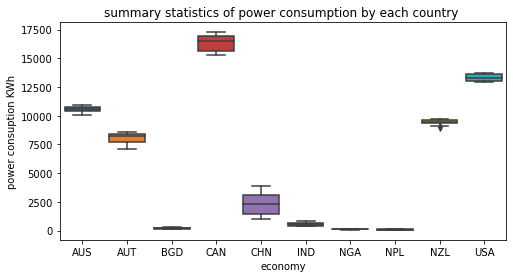

In [32]:
# visualization of all countries power consumption from 2008 to 2014.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(data=ele_power_years)
plt.ylabel("power consuption KWh")
plt.title("summary statistics of power consumption by each country ")

### checking summary statistics for population growth

In [18]:
population_years = population.set_index('economy').drop("series", axis=1).T

In [19]:
population_years.describe()

economy,AUS,AUT,BGD,CAN,CHN,IND,NGA,NPL,NZL,USA
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.436191,0.446823,1.403179,1.021892,0.605589,1.477485,2.609838,0.899493,1.090279,0.879403
std,0.359988,0.167326,0.314688,0.076254,0.088802,0.202110,0.067078,0.705855,0.447197,0.117474
min,0.624678,0.240394,1.116806,0.901373,0.482960,1.145673,2.503856,-0.268486,0.548221,0.692860
25%,1.227280,0.318594,1.144738,0.957801,0.534365,1.319426,2.548456,0.292425,0.765414,0.781608
50%,1.389527,0.455937,1.226631,1.010335,0.593933,1.509222,2.632171,1.204603,0.999728,0.921713
75%,1.638321,0.542093,1.673234,1.086084,0.668036,1.633400,2.668225,1.383501,1.352602,0.948460
max,2.061045,0.781542,1.952390,1.141758,0.787957,1.768126,2.680930,1.817198,1.973559,1.112769


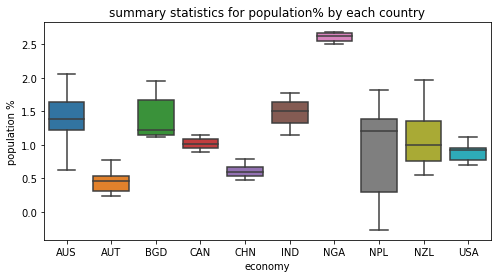

In [33]:
# visualization of all countries power consumption from 2008 to 2014.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(data=population_years)
plt.ylabel("population %")
plt.title("summary statistics for population% by each country")

# Correlation

##### checking correlation between AUS population growth and energy consumption

In [86]:
def filtering_corr_vars(population_years, ele_power_years,  country_name):
    
    '''returning electricity consumption values and population growth values for checking correlation'''
    
    aus_pop = population_years[country_name].round(2)
    aus_ene = ele_power_years[country_name].round(2)
    
    return (aus_pop, aus_ene,)

In [87]:
x, y = filtering_corr_vars(population_years, ele_power_years, "AUS")

In [88]:
def finding_corr(x, y):
    
    r, p = stats.pearsonr(x, y)
    print("correlation coefficient r:", r)
    print("probability p:", p)

In [89]:
finding_corr(x, y)

correlation coefficient r: -0.1358376789831978
probability p: 0.629306091388153


In [90]:
# check the correlation of the data using scatterplot.

def scatter(x,y, country):
    
    """ check the correlation between the power consumption and population %."""

    plt.figure(figsize = (10, 5))
    plt.scatter(x , y)
    plt.grid(color='red')
    plt.xlabel("population %")
    plt.ylabel("power consumption(KWh)")
    plt.title(f"Correlation b/w {country} population and power consumption (KWh)")
    plt.show()


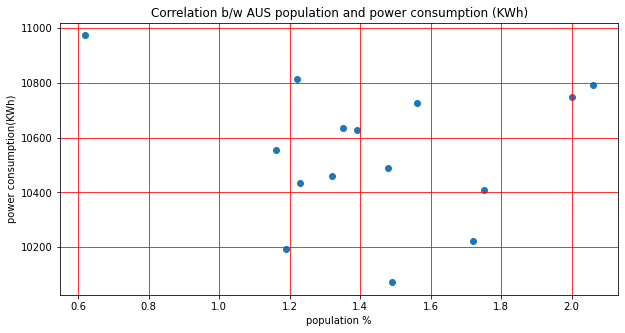

In [91]:
scatter(x, y, "AUS")

##### checking correlation between IND energy consumption and population growth

correlation coefficient r: -0.9950461299949673
probability p: 2.0198866668981763e-14


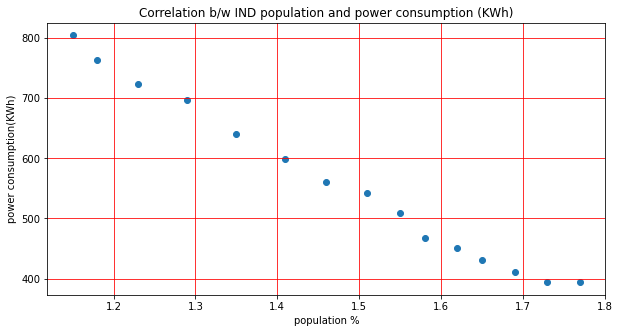

In [92]:
# calling required functions for finding correlation between ind electicity consumption and population growth
x, y = filtering_corr_vars(population_years, ele_power_years, "IND")
finding_corr(x, y)
scatter(x, y, "IND")